In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [2]:
df = pd.read_csv('Dataset Twitter Fix - Indonesian Sentiment Twitter Dataset Labeled (1).csv')


In [3]:
df = df.dropna()
df['sentimen'] = df['sentimen'].astype(int)


In [4]:
df

,sentimen,Tweet
0,0,barusan liat tulisan di belakang truk rela inj...
1,0,her itu lho miss kevin sama keven rebutan gimb...
2,0,iya rep gatau aku masih kelas 4 sd ehh di block
3,0,aku mohon tepatilah janjimu penantiancintaeps19
4,0,bukan beria nk kahwin sbb gatal celah kangkang...
...,...,...
12642,6,"Jangan dibahas dong, udah paham aja kan di kau..."
12643,6,di agama lo nyembah nya siapa sih? masa Tuhan ...
12644,6,"Katanya demi kemanusiaan, kemanusiaan milik ma..."
12645,6,Orang timur kurang pintar dari orang barat


In [5]:
# Value counts
df['sentimen'].value_counts()

sentimen
0    5327
2    4188
1    2792
4     152
6     100
3      58
5      29
Name: count, dtype: int64

In [6]:
# Modifieng Dataset
df = df[df['sentimen'] != 3]
df = df[df['sentimen'] != 4]
df = df[df['sentimen'] != 5]
df = df[df['sentimen'] != 6]
df = df[df['sentimen'] != 0]
df['sentimen'][df['sentimen'] == 2] = 0

C:\Users\Axioo Pongo\AppData\Local\Temp\ipykernel_6412\3982467523.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['sentimen'][df['sentimen'] == 2] = 0


In [7]:
# Stopwords
stop_words = StopWordRemoverFactory().get_stop_words()
print(stop_words)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [8]:
def preprocess_text(review):
    review = re.sub(r"http\S+", "", review)             # menghapus link website
    review = re.sub("\S*\d\S*", "", review).strip()     # proses menghapus nomor
    review = re.sub('[^A-Za-z]+', ' ', review)          # proses menghapus selain huruf
    review = review.translate(str.maketrans("","",string.punctuation)) #menghapus tanda baca
    review = review.lower()                             # proses case folding
    review = [word for word in review.split(" ") if not word in stop_words] # proses stop word
    review = " ".join(review)
    review.strip()
    return review

df['Tweet'] = df['Tweet'].apply(lambda x: preprocess_text(x))

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Axioo Pongo\AppData\Local\Temp\ipykernel_6412\4294929657.py:3: SyntaxWarning: invalid escape sequence '\S'
  review = re.sub("\S*\d\S*", "", review).strip()     # proses menghapus nomor


In [9]:
df['Tweet']

5327     doa rezeki tak putus inna haa zaa larizquna ma...
5328          makasih loh ntar hasil aku sisanya buat kamu
5329     aku menjadi satu satunya bukan nomor satu satu...
5330     i dont know why but these zikir sangat membant...
5331               aah kamu aja mas aku lebih suka diayomi
                               ...                        
12602              tp gue gak ngerti sh maksudnya apa wkwk
12603    aku ingatkan gagal tadbir negara elok je salah...
12604    kalo kamu mana bukan daerahmu coba buat ngehar...
12606    biasalah tu perempuan kena berjaga jaga muka m...
12607    terkadang kamu perlu membentang jarak tau arti...
Name: Tweet, Length: 6980, dtype: object

In [10]:
X = df['Tweet']
y = df['sentimen']



In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Import tokenizer and pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


In [14]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [15]:
X_train = pad_sequences(X_train, maxlen=50)
X_test = pad_sequences(X_test, maxlen=50)

In [16]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2589,
       2590, 1729, 2591, 5646,    1,  200])

### Bidirectional LSTM

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam


BATCH_SIZE = 32
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(Bidirectional(LSTM(64, dropout=0, recurrent_dropout=0)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation="sigmoid"))

model.build(input_shape=(None, 50))
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 32)         │       455,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        49,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 521,665 (1.99 MB)

 Trainable params: 521,665 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=True)


In [19]:
BATCH_SIZE = 32

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=BATCH_SIZE, callbacks=[early_stopping])

Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6195 - loss: 0.6539 - val_accuracy: 0.7385 - val_loss: 0.5296
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8823 - loss: 0.2961 - val_accuracy: 0.7521 - val_loss: 0.5863
Epoch 3/20
157/175 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9736 - loss: 0.0946

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import roc_auc_score
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print('LSTM Recurrent Neural Network baseline ' + str(roc_auc_score(y_train, pred_train)))
print('LSTM Recurrent Neural Network' + str(roc_auc_score(y_test, pred_test)))

175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
LSTM Recurrent Neural Network baseline 0.9986363409955744
LSTM Recurrent Neural Network0.7990250839955146


In [ ]:
model.evaluate(X_test, y_test)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7348 - loss: 0.8631


[0.8868552446365356, 0.7299426794052124]

Text(0.5, 1.0, 'Training and Validation Accuracy')

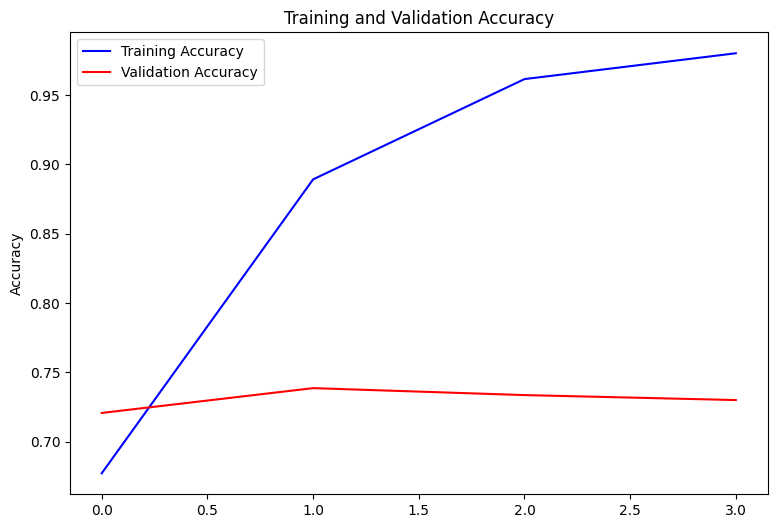

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(9,6))
plt.plot(acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='red')
plt.legend()
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

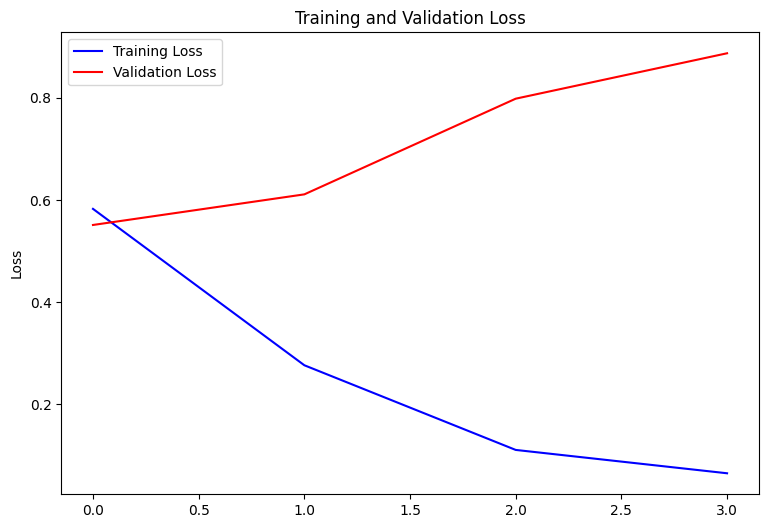

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.legend()
plt.ylabel('Loss')
plt.title('Training and Validation Loss')